In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
import tensorflow as tf
from tensorflow import keras

### Importing Data

In [12]:
train_dir=r'D:\Internshala Videos\Deep Learning\Internshala ipynb\IR Project Data\Data\cats_and_dogs\train'
test_dir=r'D:\Internshala Videos\Deep Learning\Internshala ipynb\IR Project Data\Data\cats_and_dogs\test'
validation_dir=r'D:\Internshala Videos\Deep Learning\Internshala ipynb\IR Project Data\Data\cats_and_dogs\validation'

### Data Preprocessing

 Read the Picture Files

Decode the JPEG content to RBG grids of pixels

Convert these into floating point tensors

Rescale the pixel values(0,255) to the [0,1] interval

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
#generating Batches of tensor image data

train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    train_dir,      # go to train data folder in the directory
    target_size=(150,150),   #Reshaping size into 150 x 150 pixels
    batch_size=20,           #Data Stores as 20 batches
    class_mode='binary'
)

validation_generator=test_datagen.flow_from_directory(
    validation_dir,   #go to validation folder in the directory
    target_size=(150,150),   #Reshaping size into 150 x 150 pixels
    batch_size=20,           #Data Stores as 20  batches
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Model 

In [16]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [19]:
model=models.Sequential()

 #layer 1
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))  #(filters,window,activation,input_shape)
model.add(layers.MaxPooling2D((2,2)))


# layer2
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))


#layer 3
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))

#layer 4
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))


#layer 5

model.add(layers.Flatten())

#layer 6
model.add(layers.Dense(512,activation='relu'))   #(neruons,activation)

 #output layer

model.add(layers.Dense(1,activation='sigmoid'))



In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)     

In [21]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),  # lr means learning rate 
                                                     #1e-4 means 0.0001
             metrics=['acc']
)

c:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [22]:
history=model.fit_generator(
    train_generator,
    steps_per_epoch=100,   #no.of images per epoch
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50
)

C:\Users\Rohit\AppData\Local\Temp\ipykernel_47656\2746844675.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(


Epoch 1/20
100/100 [==============================] - 97s 962ms/step - loss: 0.6909 - acc: 0.5215 - val_loss: 0.6967 - val_acc: 0.5000
Epoch 2/20
100/100 [==============================] - 66s 664ms/step - loss: 0.6594 - acc: 0.6030 - val_loss: 0.6328 - val_acc: 0.6390
Epoch 3/20
100/100 [==============================] - 67s 674ms/step - loss: 0.6063 - acc: 0.6815 - val_loss: 0.6153 - val_acc: 0.6490
Epoch 4/20
100/100 [==============================] - 69s 688ms/step - loss: 0.5729 - acc: 0.6975 - val_loss: 0.6304 - val_acc: 0.6380
Epoch 5/20
100/100 [==============================] - 66s 665ms/step - loss: 0.5378 - acc: 0.7280 - val_loss: 0.6517 - val_acc: 0.6460
Epoch 6/20
100/100 [==============================] - 67s 669ms/step - loss: 0.5082 - acc: 0.7505 - val_loss: 0.5673 - val_acc: 0.6970
Epoch 7/20
100/100 [==============================] - 68s 677ms/step - loss: 0.4771 - acc: 0.7670 - val_loss: 0.5933 - val_acc: 0.6820
Epoch 8/20
100/100 [==============================] - 6

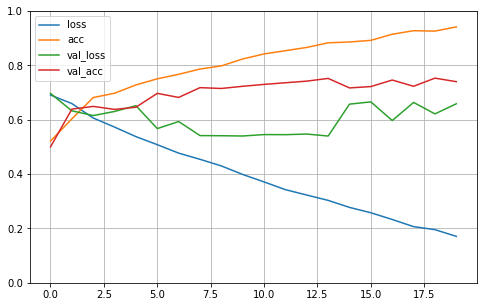

In [23]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [24]:
model.save('model.h5')

In [25]:
keras.backend.clear_session()
del model